Exercise 1.10

This coin flipping experiment simulates the issues that you will experience if applying Hoeffding's Inequality to multipe bins. Please read pages 16 - 42 of 'Learning from data - A short course' carefully. Whilst digesting this experiment and understanding its rammifications, please answer the following questions:

-  What variable in the experiment represents the number of bins from Fig. 1.10?
-  What variable in the experiment represents the number of training samples?
-  What coins obey the Hoeffding Inequality and why?
-  What is the parallel with Ein and Eout (in-sample and out-of-sample error) respectively as is suggested in the book?

In [25]:
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
import math

In [48]:
numCoins = 1000
N=10
repeats = 10000

In [26]:
def flip():
    rnd.seed()
    return rnd.randint(0,1)

In [49]:
def experiment():
    outcomes = []
    for i in range(numCoins):
        out=0
        for flips in range(N):
            out += flip()
        outcomes.append(out/N)
    v_1 = outcomes[0]
    v_rand = outcomes[rnd.randint(0,numCoins-1)]
    v_min = min(outcomes)
    return v_1,v_rand,v_min

In [ ]:
dist_1 = []
dist_rand=[]
dist_min=[]
lists = [dist_1, dist_rand, dist_min]
for e in range(repeats):
    for x, lst in zip(experiment(), lists):
        lst.append(x)


plt.hist(lists[0])
plt.title('Distribution first coin')
plt.show()

plt.hist(lists[1])
plt.title('Distribution random coin')
plt.show()

plt.hist(lists[2])
plt.title('Distribution minimum coin')
plt.show()

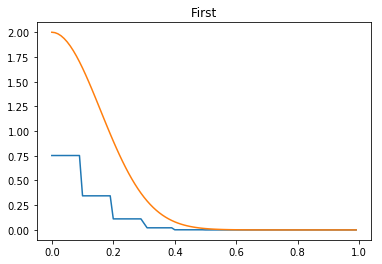

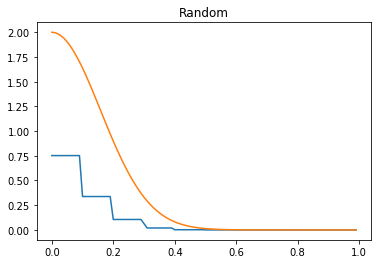

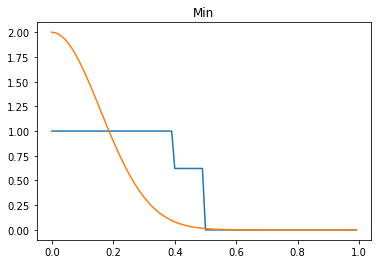

In [52]:
titles = ["First", "Random", "Min"]
for d in range(0,3):
    dist = lists[d]
    prob_epsilon=[]
    epsilons = np.arange(0, 1, 0.01)
    for e in epsilons:
        prob_epsilon.append(len([1 for i in dist if abs(i-0.5) > e])/len(dist))
    
    plt.figure()
    plt.plot(epsilons, prob_epsilon)
    plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons])
    plt.title(titles[d])
    plt.show